In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [5]:
#Importing the dataset
dataset = pd.read_excel('아파트매매가격지수_경기도_10년.xlsx',index_col = 0)

data = dataset
data

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,이천시,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,69.5,...,89.2,92.6,71.1,73.0,82.4,82.0,102.8,93.6,59.7,83.2
2013-02-01 00:00:00,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,69.0,...,89.4,92.8,70.9,72.9,82.0,81.7,102.8,93.6,59.1,83.0
2013-03-01 00:00:00,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,68.6,...,89.7,92.8,70.8,72.8,81.9,81.4,102.7,93.6,58.7,82.9
2013-04-01 00:00:00,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,68.1,...,90.1,93.5,70.7,73.2,82.3,81.7,102.7,93.9,58.6,82.9
2013-05-01 00:00:00,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,68.1,...,90.4,93.8,71.0,73.6,82.3,81.9,103.6,94.7,58.8,82.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,107.6,...,110.3,114.8,105.3,111.6,107.9,109.5,106.6,108.4,112.9,115.9
2021-12-01 00:00:00,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,108.0,...,112.3,116.1,105.6,111.6,108.4,109.8,107.2,109.0,113.0,116.7
2022-01-01 00:00:00,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,108.1,...,113.3,116.9,105.6,111.5,108.7,109.8,107.1,109.2,113.0,116.8


In [17]:
seq_len = 50
sequence_length = seq_len + 1
ratio = data['수원시'].values

result = []
for index in range(len(ratio) - sequence_length):
    result.append(ratio[index: index + sequence_length])

    
result

[array([63.4, 63.3, 63.2, 63.3, 63.4, 63.5, 63.4, 63.2, 63.2, 63.4, 63.6,
        63.8, 64. , 64.1, 64.4, 64.4, 64.3, 64.5, 64.5, 64.8, 65.5, 65.8,
        66.1, 66.5, 66.8, 67.2, 67.6, 68. , 68.5, 69. , 69.3, 69.7, 70. ,
        70.3, 70.6, 70.7, 70.8, 70.8, 70.8, 70.7, 70.7, 70.7, 70.7, 70.8,
        70.8, 70.9, 71.1, 71.2, 71.2, 71.2, 71.3]),
 array([63.3, 63.2, 63.3, 63.4, 63.5, 63.4, 63.2, 63.2, 63.4, 63.6, 63.8,
        64. , 64.1, 64.4, 64.4, 64.3, 64.5, 64.5, 64.8, 65.5, 65.8, 66.1,
        66.5, 66.8, 67.2, 67.6, 68. , 68.5, 69. , 69.3, 69.7, 70. , 70.3,
        70.6, 70.7, 70.8, 70.8, 70.8, 70.7, 70.7, 70.7, 70.7, 70.8, 70.8,
        70.9, 71.1, 71.2, 71.2, 71.2, 71.3, 71.4]),
 array([63.2, 63.3, 63.4, 63.5, 63.4, 63.2, 63.2, 63.4, 63.6, 63.8, 64. ,
        64.1, 64.4, 64.4, 64.3, 64.5, 64.5, 64.8, 65.5, 65.8, 66.1, 66.5,
        66.8, 67.2, 67.6, 68. , 68.5, 69. , 69.3, 69.7, 70. , 70.3, 70.6,
        70.7, 70.8, 70.8, 70.8, 70.7, 70.7, 70.7, 70.7, 70.8, 70.8, 70.9,
        

In [7]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((54, 50, 1), (6, 50, 1))

In [8]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, activation = 'tanh', input_shape=(50, 1)))

model.add(LSTM(64,activation = 'relu' ,return_sequences=False))

model.add(Dense(1, activation='tanh'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train, y_train,
    batch_size=10,
    epochs=20)

Epoch 1/20
6/6 [==============================] - 5s 39ms/step - loss: 0.0221
Epoch 2/20
6/6 [==============================] - 0s 37ms/step - loss: 0.0096
Epoch 3/20
6/6 [==============================] - 0s 45ms/step - loss: 0.0060
Epoch 4/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0060
Epoch 5/20
6/6 [==============================] - 0s 41ms/step - loss: 0.0048
Epoch 6/20
6/6 [==============================] - 0s 40ms/step - loss: 0.0059
Epoch 7/20
6/6 [==============================] - 0s 38ms/step - loss: 0.0038
Epoch 8/20
6/6 [==============================] - 0s 40ms/step - loss: 0.0036
Epoch 9/20
6/6 [==============================] - 0s 50ms/step - loss: 0.0021
Epoch 10/20
6/6 [==============================] - 0s 50ms/step - loss: 0.0017
Epoch 11/20
6/6 [==============================] - 0s 52ms/step - loss: 0.0017
Epoch 12/20
6/6 [==============================] - 0s 41ms/step - loss: 0.0019
Epoch 13/20
6/6 [==============================] - 0s 38ms/st

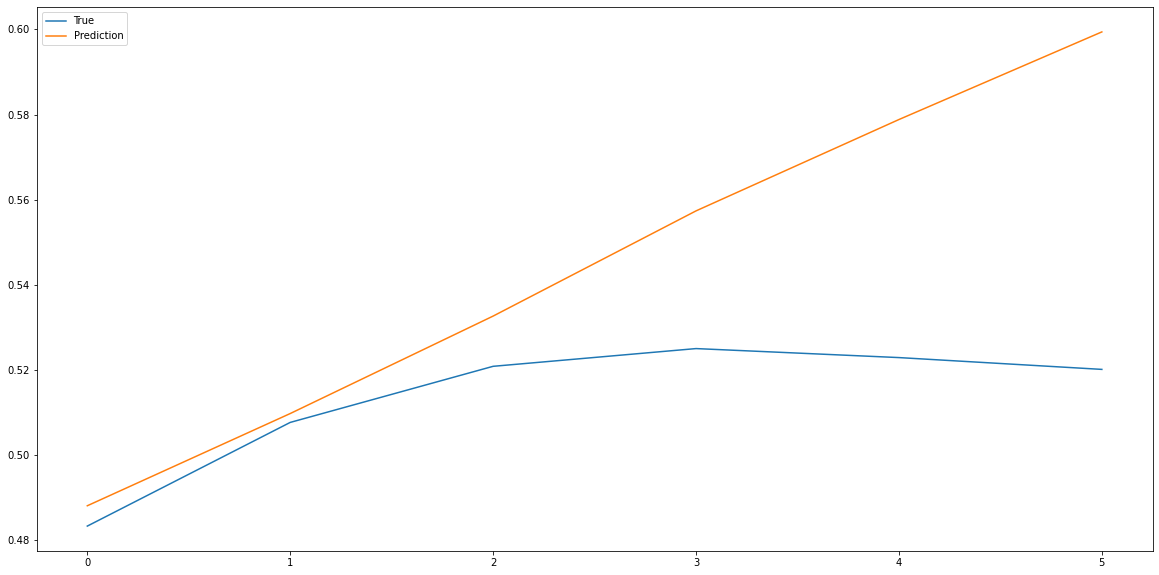

In [10]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [11]:
y_test

array([0.48328691, 0.50764951, 0.52083333, 0.525     , 0.52288488,
       0.52011096])